<div style="padding:10px; 
            color:black;
            margin:10px;
            font-size:150%;
            display:block;
            border-radius:1px;
            border-style: solid;
            border-color:skyblue;
            background-color:#00EFFF;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b style="color:black">Table of Contents</b>
    </center>
    <ul>
        <li>
            <a href="#1" style="color:black">1 -  Overview</a>
        </li>
        <li>
            <a href="#2" style="color:black">2 -  Imports</a>
        </li>
        <li>
            <a href="#3" style="color:black">3 - Data Loading and Analysis</a>
        </li>
         <li>
            <a href="#4" style="color:black">4 - Data Preprocessing</a>
        </li>
            <li>
            <a href="#5" style="color:black">5 - Model Implementation </a>
        </li>
        <li>
            <a href="#6" style="color:black">6 - Evaluation</a>
        </li>
        <li>
            <a href="#7" style="color:black">7 - Thank you</a>
        </li>
    </ul>
</div>


<a id="1"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Overview</center></h1>


# Overview

**Previously we've implemented our first regression algorithm [Linear Regression](https://www.kaggle.com/code/fareselmenshawii/from-scratch-linear-regression)**

**In this notebook we'll be implementing our first classification algorithm**

**Let's get started**    


<a id="2"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Imports</center></h1>

# Imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
import pickle

<a id="3"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Loading and Analysis</center></h1>

# Data Loading and Analysis

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [5]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [6]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [9]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [10]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [11]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [12]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing</center></h1>

# Data Preprocessing

In [13]:
df.drop('id', axis=1, inplace=True) #drop redundant columns


In [14]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

**Now let's get highly correlated features with the target**

In [15]:
corr = df.corr()

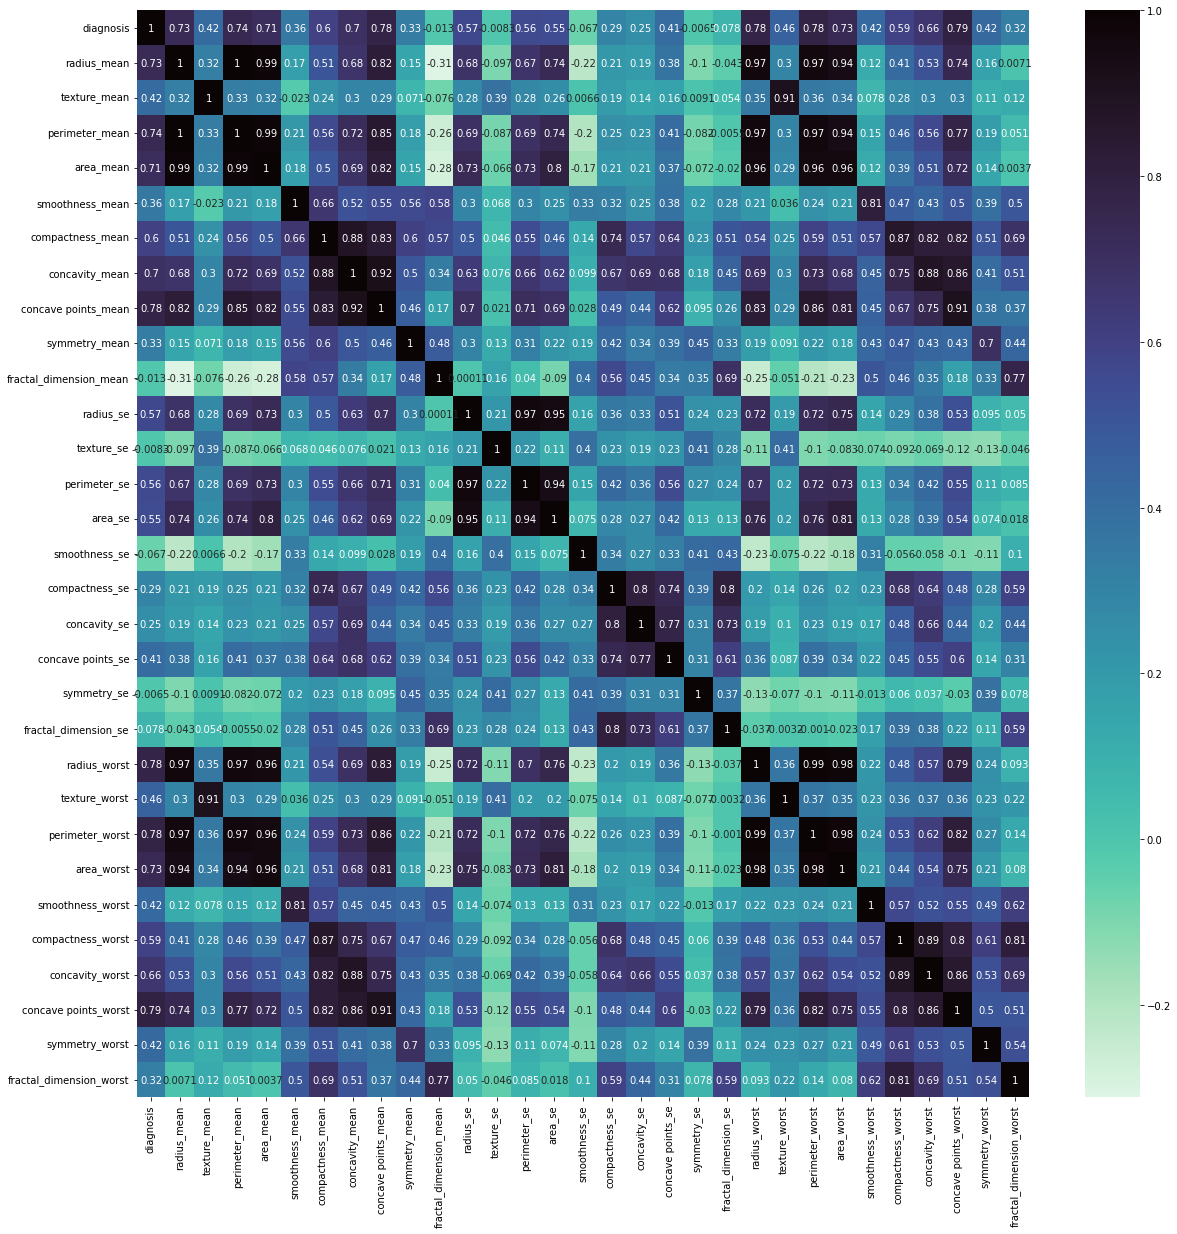

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [17]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


In [18]:
X = df[names].values
y = df['diagnosis'].values

In [19]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Standardize the data

Standardization is a preprocessing technique used in machine learning to rescale and transform the features (variables) of a dataset to have a mean of 0 and a standard deviation of 1. It is also known as "z-score normalization" or "z-score scaling." Standardization is an essential step in the data preprocessing pipeline for various reasons:

### Why Use Standardization in Machine Learning?

1. **Mean Centering**: Standardization centers the data by subtracting the mean from each feature. This ensures that the transformed data has a mean of 0. Mean centering is crucial because it helps in capturing the relative variations in the data.

2. **Scale Invariance**: Standardization scales the data by dividing each feature by its standard deviation. This makes the data scale-invariant, meaning that the scale of the features no longer affects the performance of many machine learning algorithms. Without standardization, features with larger scales may dominate the learning process.

3. **Improved Convergence**: Many machine learning algorithms, such as gradient-based optimization algorithms (e.g., gradient descent), converge faster when the features are standardized. It reduces the potential for numerical instability and overflow/underflow issues during training.

4. **Comparability**: Standardizing the features makes it easier to compare and interpret the importance of each feature. This is especially important in models like linear regression, where the coefficients represent the feature's impact on the target variable.

5. **Regularization**: In regularization techniques like Ridge and Lasso regression, the regularization strength is applied uniformly to all features. Standardization ensures that the regularization term applies fairly to all features.

### How to Standardize Data

The standardization process involves the following steps:

1. Calculate the mean ($\mu$) and standard deviation ($\sigma$) for each feature in the dataset.
2. For each data point (sample), subtract the mean ($\mu$) of the feature and then divide by the standard deviation ($\sigma$) of the feature.

Mathematically, the standardized value for a feature `x` in a dataset is calculated as:

$$
\text{Standardized value} = \frac{x - \mu}{\sigma}
$$

Here, `x` is the original value of the feature, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.


In [21]:
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
        X_test (numpy.ndarray): Testing data.

    Returns:
        Tuple of standardized training and testing data.
    """
    # Calculate the mean and standard deviation using the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Standardize the data
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)

<a id="5"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Implementation</center></h1>

# Model Implementation

# Model

# Logistic Regression Model

Logistic regression is a widely used model in machine learning for binary classification tasks. It models the probability that a given input belongs to a particular class. The logistic regression model function is represented as:

$$ f_{\mathbf{w},b}(\mathbf{x}) = g(\mathbf{w} \cdot \mathbf{x} + b) $$

In this equation, $f_{\mathbf{w},b}(\mathbf{x})$ represents the predicted probability, $\mathbf{w}$ is the weight vector, $\mathbf{b}$ is the bias term, $\mathbf{x}$ is the input feature vector, and $g(z)$ is the sigmoid function:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

## Model Training

To train a logistic regression model, we aim to find the best values for the parameters $(\mathbf{w}, b)$ that best fit our dataset and provide accurate class probabilities.

### Forward Pass

The forward pass computes the linear combination of input features $\mathbf{x}$ with the weight vector $\mathbf{w}$ and the bias term $b$ and then applies the sigmoid function to the result:

$$ Z = \mathbf{x} \cdot \mathbf{w} + b $$
$$ A = \sigma(Z) $$

### Cost Function

The cost function measures the error between the predicted probabilities and the true labels. In logistic regression, we use the binary cross-entropy loss function:

$$ J(\mathbf{w},b) = -\frac{1}{m} \sum_{i=0}^{m-1} \left[y_i \log\left(f_{\mathbf{w},b}(\mathbf{x}_i)\right) + (1 - y_i) \log\left(1 - f_{\mathbf{w},b}(\mathbf{x}_i)\right)\right] $$

Here, $m$ is the number of samples, $y_i$ is the true label of sample $i$, and $f_{\mathbf{w},b}(\mathbf{x}_i)$ is the predicted probability of sample $i$ belonging to the positive class.

### Backward Pass (Gradient Computation)

The backward pass calculates the gradients of the cost function with respect to the parameters $(\mathbf{w}, b)$. These gradients are essential for updating the model parameters during training:

$$ \frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}_i) - y_i\right) $$

$$ \frac{\partial J(\mathbf{w},b)}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}_i) - y_i\right)\mathbf{x}_i $$

## Training Process

The training process involves iteratively updating the weight vector $\mathbf{w}$ and bias term $b$ to minimize the cost function. This is typically done through an optimization algorithm like gradient descent. The update equations for parameters are:

$$ \mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{\partial J}{\partial \mathbf{w}} $$

$$ b \leftarrow b - \alpha \frac{\partial J}{\partial b} $$

Here, $\alpha$ represents the learning rate, which controls the step size during parameter updates.

By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the logistic regression model learns to make better predictions and fit the data.


In [22]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.

    The sigmoid function is a mathematical function used in logistic regression and neural networks
    to map any real-valued number to a value between 0 and 1.

    Parameters:
        z (float or numpy.ndarray): The input value(s) for which to compute the sigmoid.

    Returns:
        float or numpy.ndarray: The sigmoid of the input value(s).

    Example:
        >>> sigmoid(0)
        0.5
    """
    # Compute the sigmoid function using the formula: 1 / (1 + e^(-z)).
    sigmoid_result = 1 / (1 + np.exp(-z))
    
    # Return the computed sigmoid value.
    return sigmoid_result

**Visualize the shape of the  Logistic function**

In [23]:
z = np.linspace(-12, 12, 200)

fig = px.line(x=z, y=sigmoid(z),title='Logistic Function',template="plotly_dark")
fig.update_layout(
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9"), 
    yaxis=dict(color="#41BEE9") 
)
fig.show()

In [24]:
 class LogisticRegression:
    """
    Logistic Regression model.

    Parameters:
        learning_rate (float): Learning rate for the model.

    Methods:
        initialize_parameter(): Initializes the parameters of the model.
        sigmoid(z): Computes the sigmoid activation function for given input z.
        forward(X): Computes forward propagation for given input X.
        compute_cost(predictions): Computes the cost function for given predictions.
        compute_gradient(predictions): Computes the gradients for the model using given predictions.
        fit(X, y, iterations, plot_cost): Trains the model on given input X and labels y for specified iterations.
        predict(X): Predicts the labels for given input X.
    """

    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.learning_rate = learning_rate

    def initialize_parameter(self):
        """
        Initializes the parameters of the model.
        """
        self.W = np.zeros(self.X.shape[1])
        self.b = 0.0


    def forward(self, X):
        """
        Computes forward propagation for given input X.

        Parameters:
            X (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray: Output array.
        """
#         print(X.shape, self.W.shape)
        Z = np.matmul(X, self.W) + self.b
        A = sigmoid(Z)
        return A

    def compute_cost(self, predictions):
        """
        Computes the cost function for given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.

        Returns:
            float: Cost of the model.
        """
        m = self.X.shape[0]  # number of training examples
        # compute the cost
        cost = np.sum((-np.log(predictions + 1e-8) * self.y) + (-np.log(1 - predictions + 1e-8)) * (
                1 - self.y))  # we are adding small value epsilon to avoid log of 0
        cost = cost / m
        return cost

    def compute_gradient(self, predictions):
        """
        Computes the gradients for the model using given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.
        """
        # get training shape
        m = self.X.shape[0]

        # compute gradients
        self.dW = np.matmul(self.X.T, (predictions - self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])

        self.db = np.sum(np.subtract(predictions, self.y))

        # scale gradients
        self.dW = self.dW * 1 / m
        self.db = self.db * 1 / m


    def fit(self, X, y, iterations, plot_cost=True):
        """
        Trains the model on given input X and labels y for specified iterations.

        Parameters:
            X (numpy.ndarray): Input features array of shape (n_samples, n )
            y (numpy.ndarray): Labels array of shape (n_samples, 1)
            iterations (int): Number of iterations for training.
            plot_cost (bool): Whether to plot cost over iterations or not.

        Returns:
            None.
        """
        self.X = X
        self.y = y

        self.initialize_parameter()

        costs = []
        for i in range(iterations):
            # forward propagation
            predictions = self.forward(self.X)

            # compute cost
            cost = self.compute_cost(predictions)
            costs.append(cost)

            # compute gradients
            self.compute_gradient(predictions)

            # update parameters
            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db

            # print cost every 100 iterations
            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

        if plot_cost:
            fig = px.line(y=costs,title="Cost vs Iteration",template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9", 
                xaxis=dict(color="#41BEE9",title="Iterations"), 
                yaxis=dict(color="#41BEE9",title="cost")
            )
            fig.show()


    def predict(self, X):
        """
        Predicts the labels for given input X.

        Parameters:
            X (numpy.ndarray): Input features array.

        Returns:
            numpy.ndarray: Predicted labels.
        """
        predictions = self.forward(X)
        return np.round(predictions)
    
    
    def save_model(self, filename=None):
        """
        Save the trained model to a file using pickle.

        Parameters:
            filename (str): The name of the file to save the model to.
        """
        model_data = {
            'learning_rate': self.learning_rate,
            'W': self.W,
            'b': self.b
        }

        with open(filename, 'wb') as file:
            pickle.dump(model_data, file)

    @classmethod
    def load_model(cls, filename):
        """
        Load a trained model from a file using pickle.

        Parameters:
            filename (str): The name of the file to load the model from.

        Returns:
            LogisticRegression: An instance of the LogisticRegression class with loaded parameters.
        """
        with open(filename, 'rb') as file:
            model_data = pickle.load(file)

        # Create a new instance of the class and initialize it with the loaded parameters
        loaded_model = cls(model_data['learning_rate'])
        loaded_model.W = model_data['W']
        loaded_model.b = model_data['b']

        return loaded_model

In [25]:
lg = LogisticRegression()
lg.fit(X_train, y_train,100000)

Cost after iteration 0: 0.6931471605599454
Cost after iteration 10000: 0.25707783705582454
Cost after iteration 20000: 0.19529178673689726
Cost after iteration 30000: 0.16685820756163852
Cost after iteration 40000: 0.14978939548676498
Cost after iteration 50000: 0.13818761340315544
Cost after iteration 60000: 0.1296814121248933
Cost after iteration 70000: 0.1231144039988139
Cost after iteration 80000: 0.1178516370879008
Cost after iteration 90000: 0.113513771386002


In [26]:
lg.save_model("model.pkl")

<a id="6"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>
    
    
    
# Evaluation



**In classification tasks, it's crucial to evaluate the performance of your model. There are several metrics that can help you understand how well your model is performing. Here are four commonly used classification metrics:**
## 1. Accuracy

**Formula:**
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

**Description:**
- **Accuracy** measures the proportion of correctly predicted instances out of all instances in a classification model.
- It is a widely used metric for evaluating classification performance.

**Interpretation:**
- A higher accuracy value indicates a better classification model.
- However, accuracy alone may not provide a complete picture, especially in imbalanced datasets.

## 2. Precision

**Formula:**
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$

**Description:**
- **Precision** measures the proportion of true positive predictions out of all positive predictions made by the model.
- It is a useful metric when the cost of false positives is high.

**Interpretation:**
- Higher precision means the model makes fewer false positive predictions.

## 3. Recall (Sensitivity)

**Formula:**
$$
\text{Recall (Sensitivity)} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$

**Description:**
- **Recall**, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances in the dataset.
- It is a valuable metric when it's essential to capture all positive instances.

**Interpretation:**
- Higher recall means the model captures more of the actual positive instances.

## 4. F1-Score

**Formula:**
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
$$

**Description:**
- The **F1-Score** is the harmonic mean of precision and recall.
- It provides a balance between precision and recall, making it a suitable metric when there is a trade-off between false positives and false negatives.

**Interpretation:**
- A higher F1-Score indicates a model that achieves a balance between precision and recall.



In [27]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        """
        Computes the accuracy of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The accuracy of the model, expressed as a percentage.
        """
        y_true = y_true.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)

    @staticmethod
    def precision(y_true, y_pred):
        """
        Computes the precision of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The precision of the model, which measures the proportion of true positive predictions
        out of all positive predictions made by the model.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)

    @staticmethod
    def recall(y_true, y_pred):
        """
        Computes the recall (sensitivity) of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The recall of the model, which measures the proportion of true positive predictions
        out of all actual positive instances in the dataset.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod
    def f1_score(y_true, y_pred):
        """
        Computes the F1-score of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The F1-score of the model, which is the harmonic mean of precision and recall.
        """
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

In [28]:
model = LogisticRegression.load_model("model.pkl")

In [29]:
y_pred = model.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

Accuracy: 98.23%
Precision: 100.00%
Recall: 95.24%
F1-Score: 97.56%


<a id="7"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Thank You</center></h1>
    
    
    

# Thank You

**Thank you for going through the notebook if you haev any feedback please let me know**


**We were able to implement Logistic Regression from scratch**


**Thank you for going through this notebook please leave your feedback**

**For Logistic Regression sklearn implementation please refer to this [notebook](https://www.kaggle.com/code/fareselmenshawii/logistic-regression)**

**Now that we know how to implement Linear Regression from scratch let's check [sklearn implementation](https://www.kaggle.com/code/fareselmenshawii/linear-regression)**



# 

<div style="padding:10px; 
            color:#333333;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style:solid;
            border-color:#666666;
            background-color:#F9F9F9;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Machine Learning From Scratch Series</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/linear-regression-from-scratch" style="color:#0072B2">1 - Linear Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch" style="color:#0072B2">2 -  Logistic Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch" style="color:#0072B2">3 - KMeans</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/decision-tree-classifier-from-scratch" style="color:#0072B2">4 - Decision Trees</a>
        </li> 
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/random-forest-classifier-from-scratch" style="color:#0072B2">5 -  Random Forest</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/knn-from-scratch" style="color:#0072B2">6 - KNearestNeighbor</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/pca-from-scratch?scriptVersionId=121402593" style="color:#0072B2">7 - PCA</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/svm-from-scratch" style="color:#0072B2">8 - SVM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/naive-bayes-from-scratch" style="color:#0072B2">9 - Naive Baye</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/optimized-neural-network-from-scratch" style="color:#0072B2">10 - Optimized Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch" style="color:#0072B2">11 - Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/cnn-from-scratch" style="color:#0072B2">12 - CNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/rnn-from-scratch" style="color:#0072B2">13 - RNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/lstm-from-scratch" style="color:#0072B2">14 - LSTM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/gru-from-scratch" style="color:#0072B2">15 - GRU</a>
        </li>
    </ul>
</div>